# Quantifying Shakespeare

In this notebook we will find the frequencies with which Shakespeare's words used letters.

In [8]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        if line != "":
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))

114647


The next step of our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter

In [11]:
# Gooal: Define a function named 'tally'.
# Give the function (as params) a dictionary reference (key: str, value: int) and a key
# If the key is in the dictionary, increase value by 1
# Otherwise, set key's value to 1
# It is a procedure and returns None

def tally(counts: dict[str, int], key: str) -> None:
    # We are mutating the dictionary
    """Mutate counts to increament a key by 1 if it exist, or initialize to 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str,int]:
    """Count frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    letters: list[str] = ["a", "b", "c"]
    # Loop through all lines
    # For each line loop through all characters
    #    Tally character into the counts dictionary 
    #    Chanllenge: tally only letters!: No numbers or punctuation.
    for line in lines:
        for char in line:
            if char.isalpha():
                tally(counts, char)
            # Works because we are changing the counts dictionary
    return counts


shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'t': 329016, 'h': 236599, 'e': 446203, 's': 248548, 'o': 313931, 'n': 242773, 'b': 61801, 'y': 94183, 'w': 89293, 'i': 253370, 'l': 169680, 'a': 288618, 'm': 111233, 'k': 35366, 'p': 58262, 'r': 237286, 'f': 80342, 'c': 87861, 'u': 128706, 'd': 149146, 'g': 68060, 'v': 37500, 'z': 1626, 'x': 5219, 'q': 3577, 'j': 4753}


Let's create a visualization of this data with a bar chart

In [19]:
# This is something we can look up when we need to sort through letter, ints, and son on.
items_in_dict: list[tuple[str, int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)
sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 288618, 'b': 61801, 'c': 87861, 'd': 149146, 'e': 446203, 'f': 80342, 'g': 68060, 'h': 236599, 'i': 253370, 'j': 4753, 'k': 35366, 'l': 169680, 'm': 111233, 'n': 242773, 'o': 313931, 'p': 58262, 'q': 3577, 'r': 237286, 's': 248548, 't': 329016, 'u': 128706, 'v': 37500, 'w': 89293, 'x': 5219, 'y': 94183, 'z': 1626}


<BarContainer object of 26 artists>

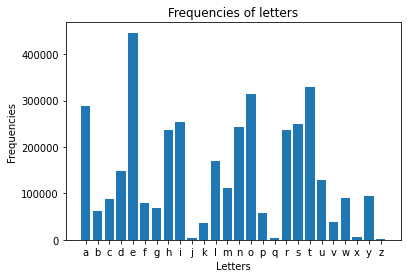

In [20]:
from matplotlib import pyplot

pyplot.title("Frequencies of letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
pyplot.bar(labels, values)